# Aufgabe 1
Verwendet in diesem Teil des Übungsblatts das Datenset um (mindestens) zwei Modelle zu entwickeln, um das
Versicherungsrisiko (insurance risk) von Fahrzeugen zu schätzen. Verwendet dazu zwei unterschiedliche
Regressionsansätze aus dem Repertoire von sklearn und dokumentiert euer vorgehen. Achtet dabei auf eine
saubere Trennung von Trainings- und Testdaten. Interpretiert anschließend eure Ergebnisse/Scores.

## Bibliotheken

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split


# Data-Loading
Die Daten wurden als gesamtes in dem Data-Preparation Notebook vorverarbeitet. Diese Vorverarbeiteten Daten werden nun hier geladen und entsprechend nach der jweiligen Output-Variable gesplitet.

In [2]:
df = pd.read_csv('../data/reg_df_prepared.csv',delimiter=',',encoding='utf-8', index_col=[0])
#df.info() # => Ausschließlich float64 // symboling = insurance risk = position 0

In [22]:
df.head()

,symboling,normalizedLosses,wheelBase,length,width,height,curbWeight,engineSize,bore,stroke,...,twelve,two.1,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3.0,189.409526,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3.0,191.881529,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,167.300466,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2.0,164.000000,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2.0,164.000000,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## EDA & Preprocessing
Diese Schritte sind in die beiden bisher behandelten Notebooks ausgelagert. Das einzige, was in diesem Notebook gemacht wird ist die Skalierung der Daten. Das hat den Grund dass die skalierten Daten auch wieder rescaled werden müssen. Um hier dann keine Verwirrung zu stiften wird somit ausschließlich hier gescalet.

## Horizontaler & vertikaler Cut

In [14]:
input_features = list(df.columns)
in_features = list(range(1, len(input_features)))
out_feature = [0]

In [15]:
input_df = df.iloc[:,in_features]
output_df = df.iloc[:,out_feature]

In [16]:
train_X, test_X, train_y, test_y = train_test_split(
    input_df, 
    output_df,
    test_size=0.2,
    random_state = 123142
) 
len(test_X), len(test_y), len(train_X), len(train_y)

(41, 41, 164, 164)

## Skalieren

In [17]:
from sklearn.preprocessing import RobustScaler

robust_scaler_X = RobustScaler()
robust_scaler_y = RobustScaler()

robust_scaler_X.fit(train_X)
robust_scaler_y.fit(train_y)

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)

In [18]:
scaled_train_X = robust_scaler_X.transform(train_X)
scaled_test_X = robust_scaler_X.transform(test_X)
scaled_train_y = robust_scaler_y.transform(train_y)
scaled_test_y = robust_scaler_y.transform(test_y)

In [19]:
pd.DataFrame(scaled_train_X, columns=input_df.columns).head(5)

,normalizedLosses,wheelBase,length,width,height,curbWeight,engineSize,bore,stroke,compressionRatio,...,twelve,two.1,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,-0.532189,-0.126582,-0.425397,-0.392857,-0.282051,-0.406910,-0.259067,-0.211640,-1.174312,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.446352,-0.379747,-0.996825,-0.607143,-0.897436,-0.282790,-0.259067,-0.550265,0.146789,-1.696970,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.051502,-0.050633,-0.038095,-0.035714,-0.641026,-0.011516,-0.010363,-0.253968,0.403670,-1.818182,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.532189,-0.126582,-0.425397,-0.392857,-0.333333,-0.371081,-0.259067,-0.211640,-1.174312,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.098712,-0.278481,-0.260317,1.000000,-1.000000,0.468330,0.839378,1.375661,-0.880734,0.606061,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Modellierung
hier mal der first Shot mit einer Linearen Regression. Ich "jage" nahezu 80 Feature in das Modell. Daher dient, das folgende nur als "first Shot". Im Anschluss erstelle ich eine PCA, und beginne das ganze von neuem.

In [27]:
from sklearn.linear_model import LinearRegression

linerar_regressor = LinearRegression()
linerar_regressor.fit(scaled_train_X, scaled_train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
linerar_regressor.coef_

array([[ 0.2453964 , -0.33391145, -0.04989187,  0.19396553,  0.05314253,
        -0.21021792,  0.58745597,  0.00400162, -0.08115908,  0.05656754,
        -0.30403007,  0.01761131, -0.09002451,  0.03602026, -0.11052498,
        -0.27940149,  0.90865026, -0.49793964, -0.05554004,  0.00693032,
         0.18381926, -0.35104775, -0.35435264, -0.08424149, -0.03398327,
        -0.29228596,  0.2406709 , -0.00410226, -0.40952071, -0.07224499,
         0.04108276,  0.32031764,  0.96573108, -0.05408643, -0.11117893,
         0.66856871, -0.73584534, -0.37259534,  0.37259534, -0.16423607,
         0.16423607, -0.17499707,  0.17499707,  0.13742144, -0.00132577,
        -0.05342757, -0.088215  ,  0.0055469 , -0.26216415, -0.0542548 ,
         0.31641895,  0.04762363, -0.04762363, -0.04895824,  0.08772839,
         0.01047763, -0.11552125, -0.10171006, -0.39407228,  0.5620558 ,
        -0.51451189, -0.59330655,  0.09921486,  0.02654943,  0.41999834,
         0.        ,  0.5620558 , -0.22025299,  0.0

In [29]:
prediction = linerar_regressor.predict(scaled_test_X)

In [30]:
robust_scaler_y.inverse_transform(prediction)

array([[ 0.33159617],
       [ 1.53142578],
       [ 0.03179029],
       [ 0.21842079],
       [ 2.29509826],
       [ 1.96540609],
       [-0.70362849],
       [ 2.95062549],
       [ 1.70117678],
       [ 1.99370164],
       [ 0.04514166],
       [ 1.21892055],
       [ 0.04580592],
       [ 1.44939977],
       [ 2.15873798],
       [ 1.20605432],
       [ 0.2753311 ],
       [ 0.01616728],
       [ 2.10515671],
       [-0.90263504],
       [ 0.81603272],
       [-0.93308001],
       [ 2.20493097],
       [-0.82766944],
       [-1.42339086],
       [ 0.63747447],
       [ 2.94272849],
       [ 0.48074362],
       [ 1.80693722],
       [ 0.27860044],
       [-0.34977776],
       [ 0.04488225],
       [ 0.19401469],
       [ 0.81963472],
       [ 3.62223193],
       [ 1.8203277 ],
       [ 0.85696982],
       [-0.01610464],
       [-0.11059347],
       [ 0.59814841],
       [ 0.04291732]])

In [31]:
# helper Function
def plot_pred_act(prediction, actual):
    
    r_min = actual.min()
    r_max = actual.max()
    
    red_color = '#d5042a'
    orange_color = '#ED7D31'
    blue_color = '#43bed8'
    lightgreen_color = '#98c235'
    darkgreen_color = '#0b8f6a'
    darkblue_color = '#0062A7'
    lightblue_color = '#4DBED3'    
    
    plt.figure(figsize=(8,8))
    plt.scatter(
        y=prediction,
        x=actual,
        alpha=0.2,
        marker=".",
        color=lightgreen_color
    )
    plt.xlim(r_min, r_max)
    plt.ylim(r_min, r_max)
    plt.plot([r_min, r_max], [r_min, r_max], "-", color=red_color)
    plt.title("Prediction vs Actual")
    plt.xlabel("actual")
    plt.ylabel("predicted")

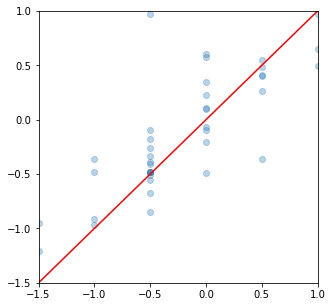

In [32]:
from matplotlib import pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(x=scaled_test_y, y=prediction, alpha=0.3)
plt.xlim([scaled_test_y.min(), scaled_test_y.max()])
plt.ylim([scaled_test_y.min(), scaled_test_y.max()])
plt.plot(
    [scaled_test_y.min(), scaled_test_y.max()],
    [scaled_test_y.min(), scaled_test_y.max()],
    "r-"
)

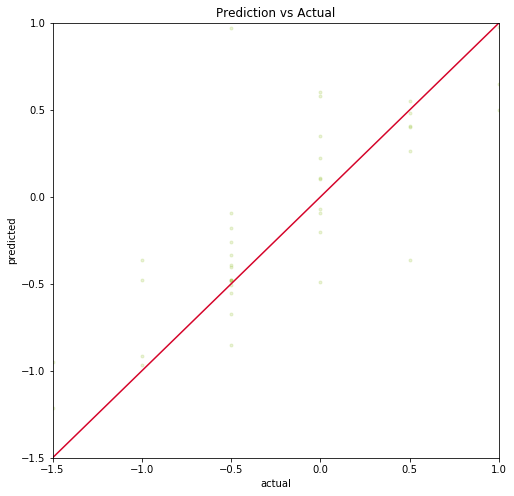

In [33]:
plot_pred_act(prediction, scaled_test_y)

In [34]:
 linerar_regressor.score(scaled_test_X, scaled_test_y)

0.6178365009803053

In [35]:
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
import numpy as np
robust_scaler_y.inverse_transform([[np.sqrt(mean_squared_error(scaled_test_y, prediction))]])

array([[1.7814366]])

In [38]:
r2_score(scaled_test_y, prediction)

0.6178365009803053

## Random Forrest

In [39]:
from sklearn.ensemble import RandomForestRegressor

forest_regressor = RandomForestRegressor(n_estimators=100)
forest_regressor.fit(scaled_train_X, scaled_train_y)

C:\Users\1810837475\.conda\envs\Kompensationsarbeit\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [40]:
forest_prediction = forest_regressor.predict(scaled_test_X)

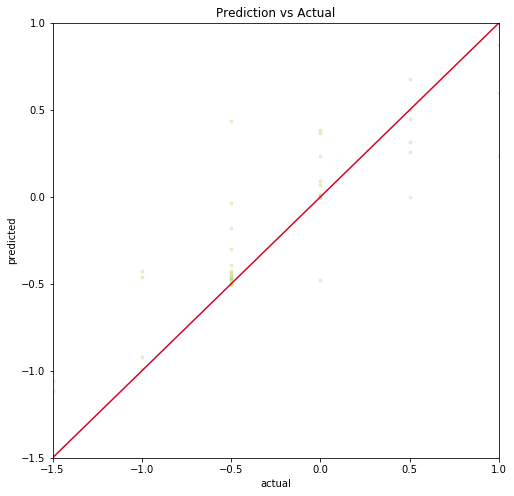

In [41]:
plot_pred_act(actual=scaled_test_y, prediction=forest_prediction)

In [42]:
forest_regressor.score(scaled_test_X, scaled_test_y)

0.7585838793745346

## Hyperparameter Tuning mit GridSearch

In [44]:
scaled_train_y.ravel()

array([-0.5,  0. ,  0. , -0.5,  1. ,  0.5, -1. , -0.5,  1. ,  0. , -0.5,
        0. ,  0. , -0.5,  0. , -0.5, -0.5, -0.5, -0.5,  1. ,  0. ,  1. ,
       -1. ,  0. ,  0. ,  0. ,  1. ,  0.5, -0.5,  0.5,  0.5,  0. ,  0.5,
       -0.5, -0.5,  0. , -0.5,  0.5,  0. ,  1. , -1. , -0.5, -0.5,  0. ,
        1. ,  0. ,  0. , -0.5,  0.5, -1. ,  0. ,  0. , -0.5, -0.5,  0. ,
        0.5,  0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -1. ,  0. , -1. ,  0.5,
        1. , -1. ,  0. ,  0.5,  1. ,  0. , -1. , -0.5,  1. ,  1. ,  0.5,
        0. , -1. , -0.5,  1. ,  0. , -0.5,  0.5,  1. , -0.5, -0.5,  0. ,
       -0.5,  0. ,  0. ,  0. ,  0.5, -1.5,  1. ,  1. , -0.5,  0.5,  0.5,
       -0.5, -0.5, -1. ,  0. ,  0. , -0.5,  0. , -0.5, -0.5,  1. ,  1. ,
        0.5,  0. ,  0.5, -0.5,  0. , -1. , -0.5,  1. ,  0.5, -0.5,  0. ,
        1. ,  0.5,  0. , -1. ,  0. , -0.5,  0. , -0.5,  0.5, -0.5, -0.5,
       -1. ,  0.5, -0.5, -0.5,  0.5, -0.5,  1. ,  0. ,  1. , -1. ,  0. ,
        0. , -0.5,  0.5, -1. ,  0.5, -1. , -0.5, -0

In [46]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

grid_forest_regressor = RandomForestRegressor()

param_grid = {
    "max_depth": [8, None],
    "n_estimators": [50, 100]
}

grid_search_object = GridSearchCV(
    estimator=grid_forest_regressor,
    param_grid=param_grid
)

grid_search_object.fit(scaled_train_X, scaled_train_y.ravel())

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [47]:
grid_search_object.best_estimator_.score(scaled_test_X, scaled_test_y)

0.7488711839166047